In [2]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel
from lib.to_precision import to_precision
import lmfit
from sympy import *
import sympy
from sympy.solvers import solve
from sympy import Symbol
import math
import datetime
from ipywidgets import interact, FloatText, IntText, fixed, Text
now = lambda: str(datetime.datetime.now()).replace("-", "").replace(":", "").replace(" ", "_").split(".")[0]
import inspect

from lmfit.models import Model
import numpy as np
import pylandau

In [3]:
class Data:
    __x = []
    __y = []
    __xerr = 0
    __yerr = 0
    __XName = "x"
    __YName = "y"
    __FileName = "dataset_1",
    __Version = ""
    __pars = None
    __func = None
    
    def set_func(self, x):
        self.__func = x
        return
    def get_func(self):
        return self.__func

    def set_x(self, x):
        self.__x = x
        return  
    def set_y(self, x):
        self.__y = x
        return  
    def set_yerr(self, x):
        self.__yerr = x
        return  
    def set_xerr(self, x):
        self.__xerr = x
        return  
    
    def get_x(self):
        return self.__x
    def get_y(self):
        return self.__y
    def get_xerr(self):
        return self.__xerr
    def get_yerr(self):
        return self.__yerr
    
    def set_XName(self, x):
        self.__XName = rf"{x}"
        return
    def set_YName(self, x):
        self.__YName = rf"{x}"
        return
    def get_XName(self):
        return self.__XName
    def get_YName(self):
        return self.__YName
    
    def get_FileName(self):
        return self.__FileName
    
    def set_FileName(self, x):
        self.__FileName = f"{x}"
        return
    def set_Version(self, x):
        self.__Version = f"{x}"
        return
    def get_Version(self):
        return self.__Version
    
    def get_pars(self):
        return self.__pars
    def set_pars(self,x):
        self.__pars = x
        return
    
def finish(x,y,result, string, y_err, yLabel, xLabel, var_func_bool= False, min=2, max=4):
    fig = plt.figure(figsize=(9,6), dpi=80)
    ax = plt.gca()
    ax.set_xlim([np.min(Daten.get_x())-5, np.max(Daten.get_x())+5])
    ax.set_ylim([np.min(Daten.get_y())-5, np.max(Daten.get_y())+5])
    
    dynamic_resolution_array = np.arange(np.min(x),np.max(x), 0.001*np.abs(np.max(x)-np.min(x)))
    #plt.plot(x, y, 'skyblue')
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))
    plt.errorbar(
        y = y, 
        x = x, 
        yerr = y_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 
    plt.legend(loc='best')
    
    plt.fill_between(np.arange(min, max, 1), 0, np.max(Daten.get_y())+5, alpha=0.2, color = "red", label = r'Fitbereich $x \in $' + f'[{min}, {max}]')

    plt.ylabel(yLabel, fontsize=20)
    plt.xlabel(xLabel, fontsize=20)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    string += Daten.get_Version()
    fig.savefig(string + "_Fit.pdf")
    plt.show()

    string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{Fits/" + string + "_Fit.pdf} \n" \
        + "\t\\caption{"+str(string)+", Fit} \n \t\\label{fig:"+str(string)+", Fit} \n\end{figure}"
    print(string_fig)

    text_file = open(string+"_params"+".tex", "w+", encoding="utf-8")
    string_fig += "\n \\\\ \n" 
    # string_fig += get_Latex_Func(Daten.get_func()) if var_func_bool else ""
    string_fig += table_of_params(result)
    text_file.write(string_fig)
    text_file.close()
    
def table_of_params_nosdterr(result_of_fit):
    sig_num = 3
    string = "" + (
        "\\begin{table}[ht] \n"
        "\centering \n") +"\caption{" + str(Daten.get_FileName()) +", Fit Parameter Tabelle} \n"  + (
        "\label{tab:my-table}\n"
        "\\begin{tabular}{|l|c|}\n" 
        "\hline\n"
        "Parameter Name\t&\tWert \\\\ \hline\n"
    )
    for i in result_of_fit.params:
        str_param_val = f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}" 
        # str_param_std = f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}" 
        string += (
            str(i) + "\t&\t" +
            str_param_val +
            ("" if "." in str_param_val  else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num+2 -len(f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}"))) +
            "\\\\ \hline\n"
        )
    string += (
        "\end{tabular} \n"
        "\end{table}"
    )
    return string


def table_of_params(result_of_fit):
    sig_num = 3
    string = "" + (
        "\\begin{table}[ht] \n"
        "\centering \n") +"\caption{" + str(Daten.get_FileName()) +", Fit Parameter Tabelle} \n"  + (
        "\label{tab:my-table}\n"
        "\\begin{tabular}{|l|c|}\n" 
        "\hline\n"
        "Parameter Name\t&\tWert \\\\ \hline\n"
    )
    for i in result_of_fit.params:
        str_param_val = f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}" 
        str_param_std = f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}" 
        string += (
            str(i) + "\t&\t" +
            str_param_val +
            ("" if "." in str_param_val  else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num+2 -len(f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}"))) +
            " \\pm "+ 
            str_param_std +
            ("" if "." in str_param_std else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num+2-len(f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}"))) +
            "\\\\ \hline\n"
        )
    string += (
        "\end{tabular} \n"
        "\end{table}"
    )
    return string

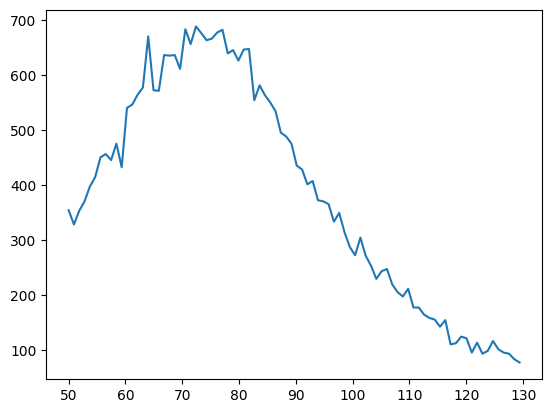

In [4]:
Datei_Name = "A4_V20.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 50, 130
mask = (x > 50) & (x < 130)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\3241472853.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


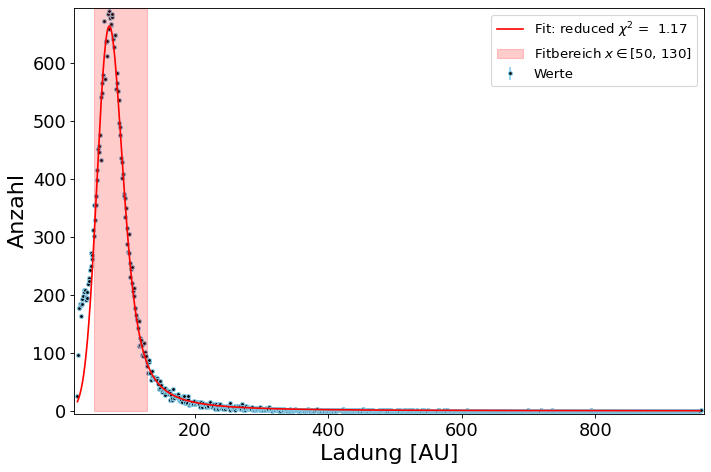

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V20.h5_charge.txt_Fit.pdf} 
	\caption{A4_V20.h5_charge.txt, Fit} 
 	\label{fig:A4_V20.h5_charge.txt, Fit} 
\end{figure}
1.167521356039766


In [5]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs, mpvs_err = [], []
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


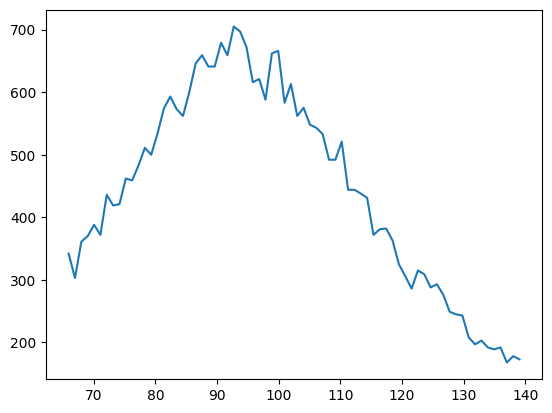

In [6]:
Datei_Name = "A4_V30.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 65,140
mask = (x > 65) & (x < 140)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


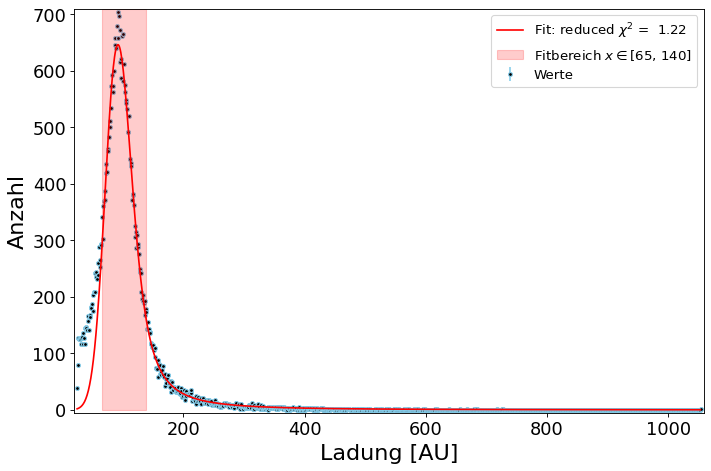

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V30.h5_charge.txt_Fit.pdf} 
	\caption{A4_V30.h5_charge.txt, Fit} 
 	\label{fig:A4_V30.h5_charge.txt, Fit} 
\end{figure}
1.2200029415368165


In [7]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


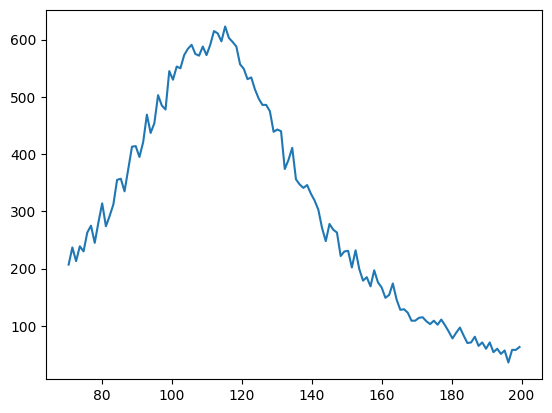

In [8]:
Datei_Name = "A4_V40.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 70, 200
mask = (x > 70) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


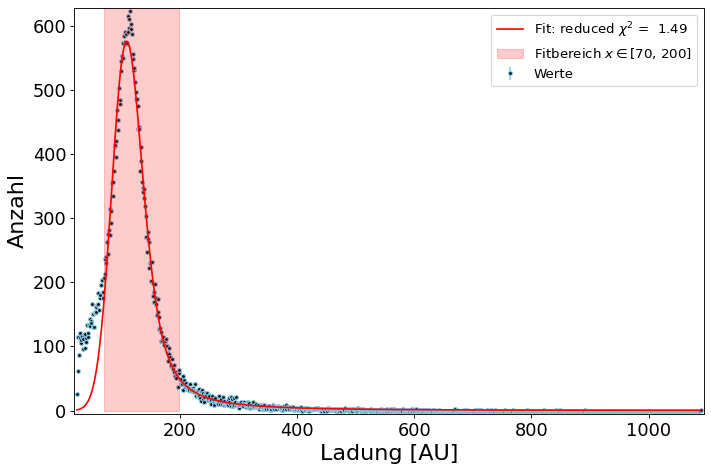

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V40.h5_charge.txt_Fit.pdf} 
	\caption{A4_V40.h5_charge.txt, Fit} 
 	\label{fig:A4_V40.h5_charge.txt, Fit} 
\end{figure}
1.4880503326801235


In [9]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


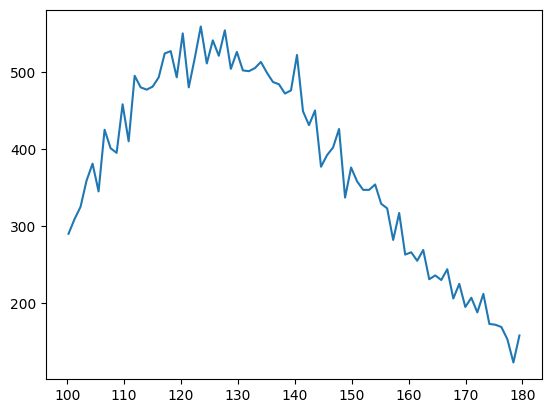

In [10]:
Datei_Name = "A4_V50.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 100, 180
mask = (x > 100) & (x < 180)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


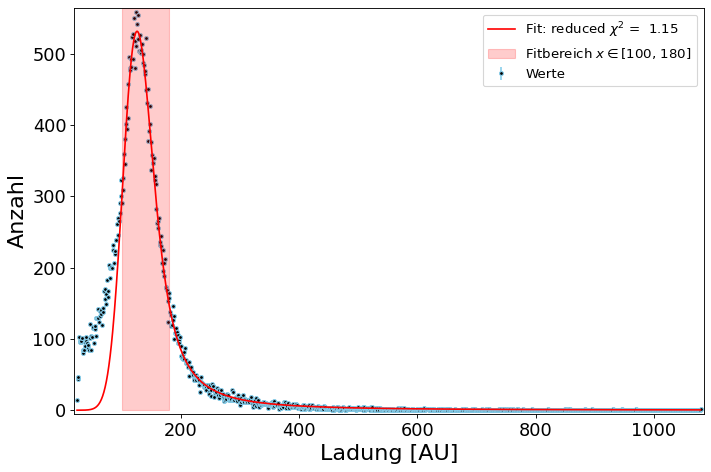

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V50.h5_charge.txt_Fit.pdf} 
	\caption{A4_V50.h5_charge.txt, Fit} 
 	\label{fig:A4_V50.h5_charge.txt, Fit} 
\end{figure}
1.1505803780388437


In [11]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


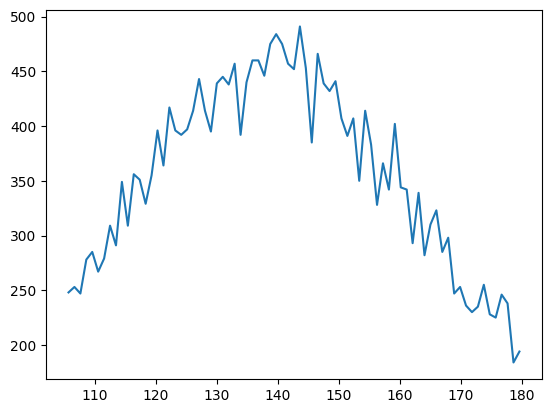

In [12]:
Datei_Name = "A4_V60.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 105, 180
mask = (x > 105) & (x < 180)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


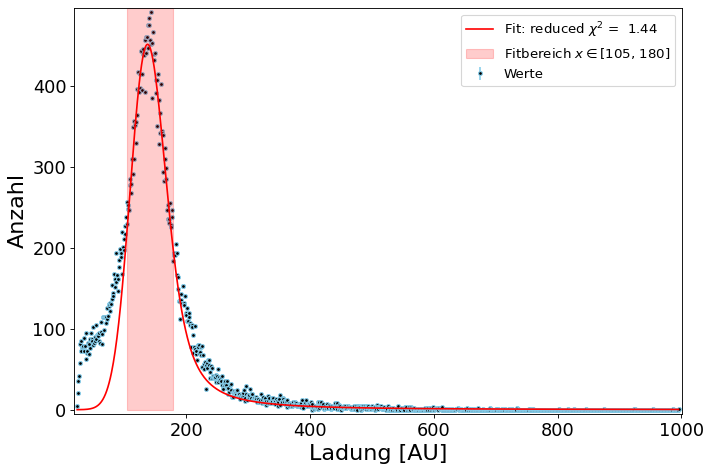

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V60.h5_charge.txt_Fit.pdf} 
	\caption{A4_V60.h5_charge.txt, Fit} 
 	\label{fig:A4_V60.h5_charge.txt, Fit} 
\end{figure}
1.435458498401283


In [13]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


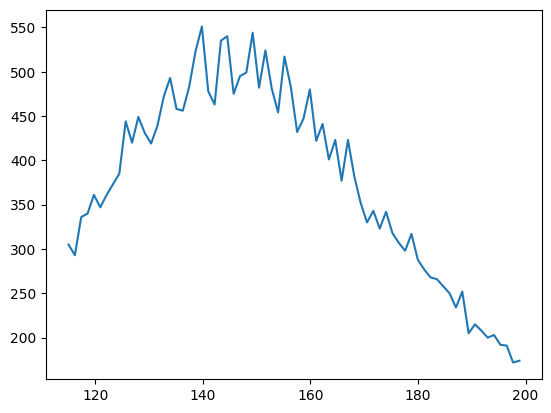

In [14]:
Datei_Name = "A4_V70.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 115, 200
mask = (x > 115) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


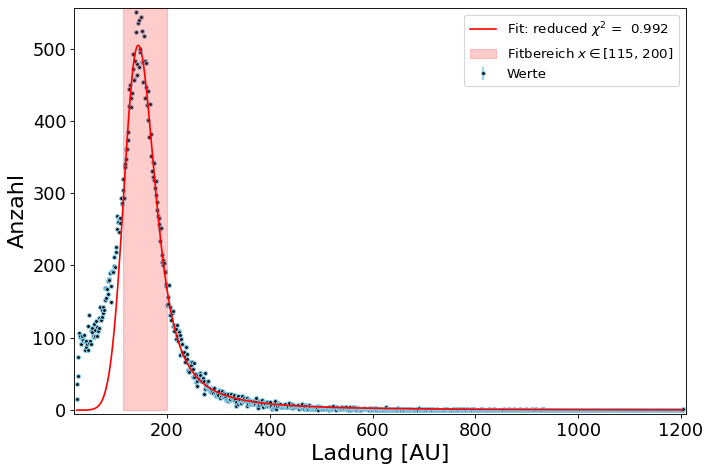

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V70.h5_charge.txt_Fit.pdf} 
	\caption{A4_V70.h5_charge.txt, Fit} 
 	\label{fig:A4_V70.h5_charge.txt, Fit} 
\end{figure}
0.9922296965180526


In [15]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


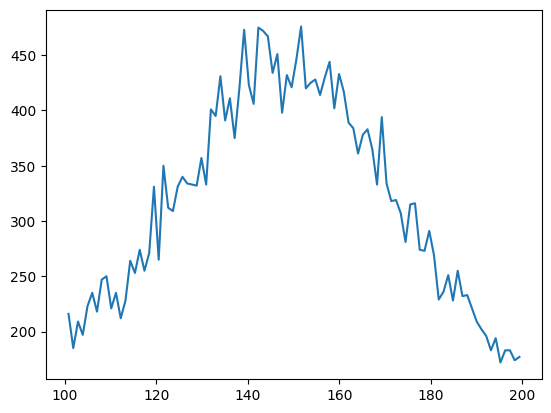

In [16]:
Datei_Name = "A4_V80.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 100, 200
mask = (x > 100) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


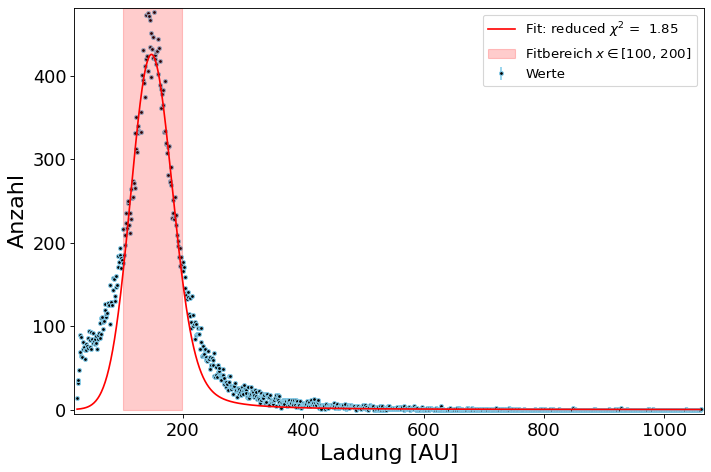

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V80.h5_charge.txt_Fit.pdf} 
	\caption{A4_V80.h5_charge.txt, Fit} 
 	\label{fig:A4_V80.h5_charge.txt, Fit} 
\end{figure}
1.8468253159437387


In [17]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


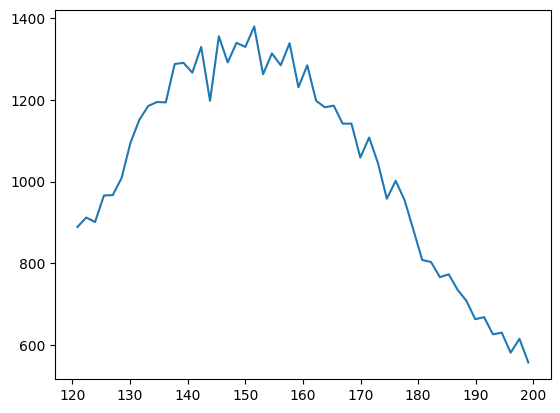

In [18]:
Datei_Name = "A3_MIP_Energy.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
min, max = 120, 200
mask = (x > min) & (x < max)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_17120\2497814729.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


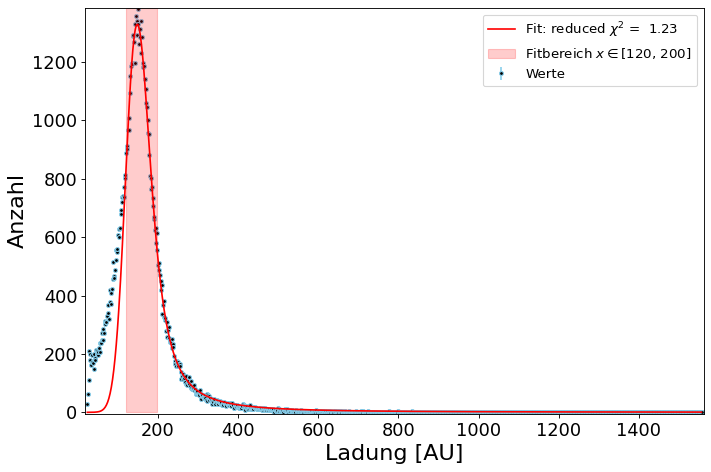

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A3_MIP_Energy.h5_charge.txt_Fit.pdf} 
	\caption{A3_MIP_Energy.h5_charge.txt, Fit} 
 	\label{fig:A3_MIP_Energy.h5_charge.txt, Fit} 
\end{figure}
1.2294996625254029


In [19]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='leastsq', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName(), min=min, max=max)
plt.show()
print(result.redchi)
mpvs.append(result.params["mpv"].value)
mpvs_err.append(result.params["mpv"].stderr)


<ErrorbarContainer object of 3 artists>

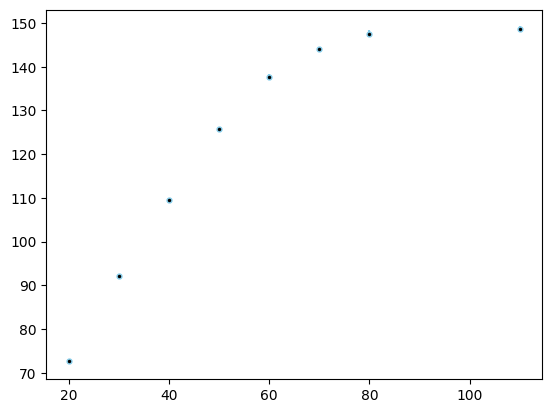

In [20]:
volts = [20,30,40,50,60,70,80,110]
plt.errorbar(
        y = mpvs, 
        x = volts, 
        yerr = mpvs_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 

In [21]:
from uncertainties import unumpy as up
charge_u = up.uarray(mpvs,mpvs_err)

def divide_res(x):
    return np.c_[[x[i].n for i in range(len(x))], [x[i].s for i in range(len(x))]]
    


<ErrorbarContainer object of 3 artists>

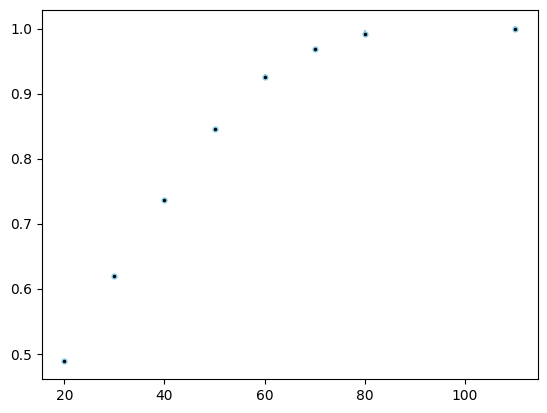

In [22]:
cce_u = charge_u/np.max(mpvs) 
y1 = divide_res(cce_u)[:,0]
y1_err = divide_res(cce_u)[:,1]

plt.errorbar(
        y = y1, 
        x = volts, 
        yerr = y1_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 

In [23]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, ConstantModel, LinearModel

mod = ConstantModel() #GaussianModel(prefix = "a")+GaussianModel(prefix = "b")
pars = mod.make_params()
pars["c"].value = 0.9

mod2 = LinearModel()
pars2 = mod2.make_params()


const_lower = 5
linear_upper = 6
result = mod.fit(y1[const_lower:], pars, x=volts[const_lower:])#, weights=1/y1_err[4:]
result_2 = mod2.fit(y1[:linear_upper], pars2, x=volts[:linear_upper], weights=1/y1_err[:linear_upper])


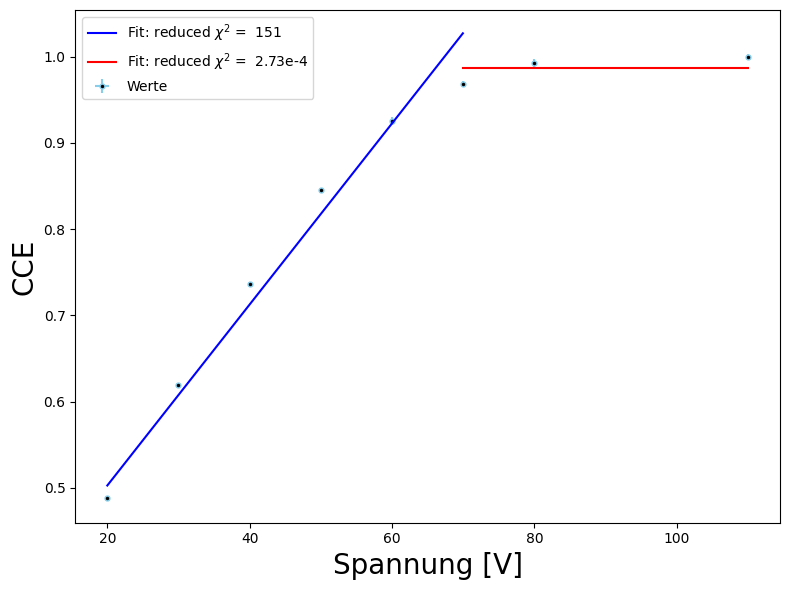

In [24]:
Daten.set_XName("Spannung [V]")
Daten.set_YName("CCE")

volts = np.array(volts)
fig = plt.figure(figsize=(8, 6))
plt.errorbar(y = y1, yerr = y1_err, x = volts, xerr = 0, \
    fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
    label = r'Werte')

dynamic_resolution_array = np.arange(np.min(volts[:linear_upper]),np.max(volts[:linear_upper]), 0.001*abs(np.max(volts[:linear_upper])-np.min(volts[:linear_upper])))
#plt.plot(x, y, 'skyblue')
plt.plot(dynamic_resolution_array, result_2.eval(x = dynamic_resolution_array), 'b-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result_2.result.redchi,3)))
dynamic_resolution_array2 = np.arange(np.min(volts[const_lower:]),np.max(volts[const_lower:]), 0.001*abs(np.max(volts[const_lower:])-np.min(volts[const_lower:])))
plt.plot(dynamic_resolution_array2, result.eval(x = dynamic_resolution_array2), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))

#plt.plot(x_fit, y_fit, label="Modell", color='red')
plt.legend()
plt.ylabel(Daten.get_YName(), fontsize=20)
plt.xlabel(Daten.get_XName(), fontsize=20)
# plt.title('Models')
plt.tight_layout()

In [25]:
c_u = up.uarray(result.params["c"].value, result.params["c"].stderr)
slope_u = up.uarray(result_2.params["slope"].value, result_2.params["slope"].stderr)
intercept = up.uarray(result_2.params["intercept"].value, result_2.params["intercept"].stderr)

In [26]:
result_2

<ErrorbarContainer object of 3 artists>

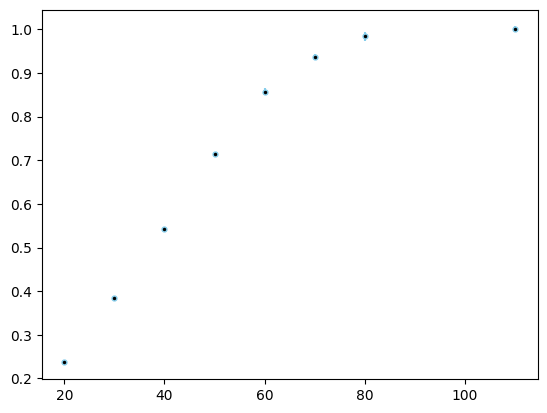

In [27]:
cce2_u = cce_u**2

y2 = divide_res(cce2_u)[:,0]
y2_err = divide_res(cce2_u)[:,1]

plt.errorbar(
        y = y2, 
        x = volts, 
        yerr = y2_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 


In [28]:
y2_err[-1]# = 0.01

0.006434260292680202

In [29]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, ConstantModel, LinearModel

mod = ConstantModel() #GaussianModel(prefix = "a")+GaussianModel(prefix = "b")
pars = mod.make_params()
pars["c"].value = 0.9

mod2 = LinearModel()
pars2 = mod2.make_params()


const_lower = 5
linear_upper = 6
result = mod.fit(y2[const_lower:], pars, x=volts[const_lower:], weights=1/y2_err[const_lower:])#
result_2 = mod2.fit(y2[:linear_upper], pars2, x=volts[:linear_upper], weights=1/y2_err[:linear_upper])


c_u = up.uarray(result.params["c"].value, result.params["c"].stderr)
slope_u = up.uarray(result_2.params["slope"].value, result_2.params["slope"].stderr)
intercept_u = up.uarray(result_2.params["intercept"].value, result_2.params["intercept"].stderr)

V_dep_u = (c_u - intercept_u)/slope_u
V_dep = V_dep_u.n
V_dep_err = V_dep_u.s


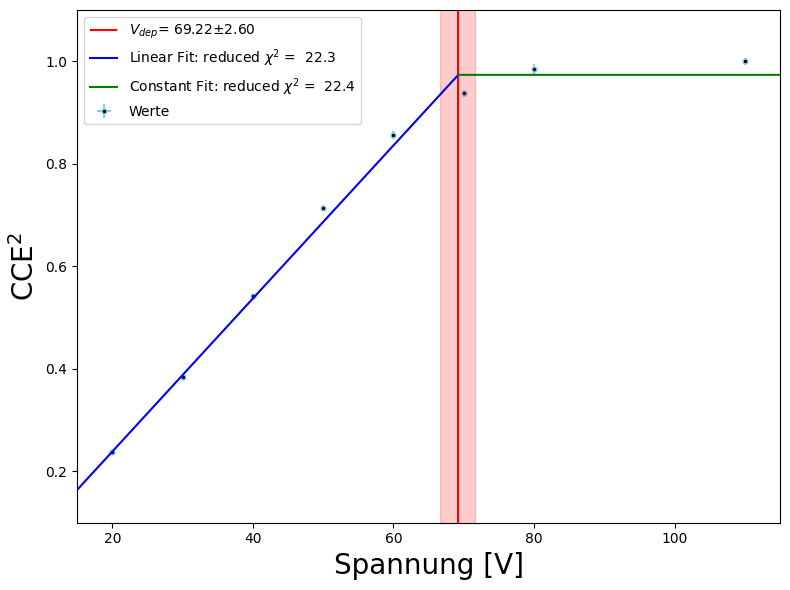

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/CCE2_5_6_Fit.pdf} 
	\caption{CCE2_5_6, Fit} 
 	\label{fig:CCE2_5_6, Fit} 
\end{figure}


In [30]:
Daten.set_XName("Spannung [V]")
Daten.set_YName(r"CCE$^2$")
volts = np.array(volts)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xlim([np.min(volts)-5, np.max(volts)+5])
ax.set_ylim([0.1, np.max(y2)+0.1])
plt.fill_between(np.arange(V_dep-V_dep_err, V_dep+V_dep_err, 1), 0, np.max(y2)+5, alpha=0.2, color = "red")
plt.vlines(V_dep, 0, np.max(y2)+5, color = "r", label = r"$V_{dep}$" + f"= {to_precision(V_dep,4)}"+r"$\pm$"+f"{to_precision(V_dep_err,3)}")
plt.errorbar(y = y2, yerr = y2_err, x = volts, xerr = 0, \
    fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
    label = r'Werte')

dynamic_resolution_array = np.arange(0,V_dep, 0.001*abs(V_dep-np.min(volts[:linear_upper])))
#plt.plot(x, y, 'skyblue')
plt.plot(dynamic_resolution_array, result_2.eval(x = dynamic_resolution_array), 'b-', label = r'Linear Fit: reduced $\chi^2$ =  '+str(to_precision(result_2.result.redchi,3)))
dynamic_resolution_array2 = np.arange(V_dep,np.max(volts[const_lower:])+5, 0.001*abs(np.max(volts[const_lower:])-V_dep))
plt.plot(dynamic_resolution_array2, result.eval(x = dynamic_resolution_array2), 'g-', label = r'Constant Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))

#plt.plot(x_fit, y_fit, label="Modell", color='red')
plt.legend()
plt.ylabel(Daten.get_YName(), fontsize=20)
plt.xlabel(Daten.get_XName(), fontsize=20)
# plt.title('Models')
plt.tight_layout()
string = f"CCE2_{const_lower}_{linear_upper}"
fig.savefig(string + "_Fit.pdf")
plt.show()

string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{Fits/" + string + "_Fit.pdf} \n" \
    + "\t\\caption{"+str(string)+", Fit} \n \t\\label{fig:"+str(string)+", Fit} \n\end{figure}"
print(string_fig)

text_file = open(string+"_params"+".tex", "w+", encoding="utf-8")
string_fig += "\n \\\\ \n" 
# string_fig += get_Latex_Func(Daten.get_func()) if var_func_bool else ""
string_fig += table_of_params(result) +  "\n"
string_fig += table_of_params(result_2)
text_file.write(string_fig)
text_file.close()
    


In [31]:
cce2_u

array([0.2381363204237771+/-0.001481074794552461,
       0.3837202854635242+/-0.002768955266517948,
       0.5416204484937227+/-0.00310924016127835,
       0.7142957796946596+/-0.004972257126761557,
       0.856760850416284+/-0.00812628402630225,
       0.9375653884595936+/-0.006944109010084282,
       0.9843824117988101+/-0.010115651894298349,
       1.0+/-0.006434260292680202], dtype=object)

In [32]:
volt_lst = np.arange(0, V_dep, V_dep/1000)
volt_err = np.arange(0, V_dep, V_dep/15)

d_u = 300*(volt_lst/V_dep_u)**(1/2)
d_u_err = 300*(volt_err/V_dep_u)**(1/2)
d = divide_res(d_u)[:,0]
d1 = divide_res(d_u_err)[:,0]
d_err = divide_res(d_u_err)[:,1]


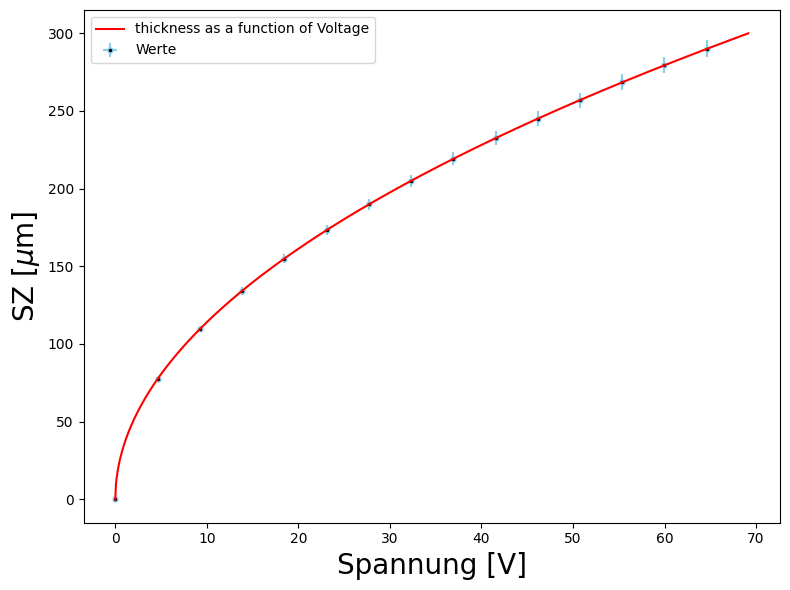

In [33]:
fig = plt.figure(figsize=(8, 6))

plt.errorbar(y = d1, yerr = d_err, x = volt_err, xerr = 0, \
    fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
    label = r'Werte')

plt.plot(volt_lst, d, 'r-',label = "thickness as a function of Voltage")

plt.legend()
plt.ylabel(r"SZ [$\mu$m]", fontsize=20)
plt.xlabel(Daten.get_XName(), fontsize=20)
# plt.title('Models')
plt.tight_layout()
string = f"SZ_fkt_V"
fig.savefig(string + "_Fit.pdf")
plt.show()